## Prompts:
-Give me a fictional US Presidential Inauguration speech given by a person in the year 2400.
-Give me a fictional US Presidential Inauguration speech given by a person in the year 1400.
-Give me a fictional US Presidential Inauguration speech give by a person in the 3000s, who is a tyrannical warmonger.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from os import listdir


In [33]:
my_path="US_Inaugural_Addresses/"

In [34]:
file_names=listdir(my_path)
file_names=sorted(file_names)
# print(file_names)

In [35]:
file_names

['01_washington_1789.txt',
 '02_washington_1793.txt',
 '03_adams_john_1797.txt',
 '04_jefferson_1801.txt',
 '05_jefferson_1805.txt',
 '06_madison_1809.txt',
 '07_madison_1813.txt',
 '08_monroe_1817.txt',
 '09_monroe_1821.txt',
 '10_adams_john_quincy_1825.txt',
 '11_jackson_1829.txt',
 '12_jackson_1833.txt',
 '13_van_buren_1837.txt',
 '14_harrison_1841.txt',
 '15_polk_1845.txt',
 '16_taylor_1849.txt',
 '17_pierce_1853.txt',
 '18_buchanan_1857.txt',
 '19_lincoln_1861.txt',
 '20_lincoln_1865.txt',
 '21_grant_1869.txt',
 '22_grant_1873.txt',
 '23_hayes_1877.txt',
 '24_garfield_1881.txt',
 '25_cleveland_1885.txt',
 '26_harrison_1889.txt',
 '27_cleveland_1893.txt',
 '28_mckinley_1897.txt',
 '29_mckinley_1901.txt',
 '30_roosevelt_theodore_1905.txt',
 '31_taft_1909.txt',
 '32_wilson_1913.txt',
 '33_wilson_1917.txt',
 '34_harding_1921.txt',
 '35_coolidge_1925.txt',
 '36_hoover_1929.txt',
 '37_roosevelt_franklin_1933.txt',
 '38_roosevelt_franklin_1937.txt',
 '39_roosevelt_franklin_1941.txt',
 '4

In [36]:
# Split combined string by tabs and newlines, then filter out any empty strings
combined_string = ' '.join(file_names)
file_list = [name.strip() for name in combined_string.split() if name.strip() and '.' in name]

# Remove the extension from each file name
text_titles = sorted([name.split('.')[0] for name in file_list])

In [37]:
text_titles

['01_washington_1789',
 '02_washington_1793',
 '03_adams_john_1797',
 '04_jefferson_1801',
 '05_jefferson_1805',
 '06_madison_1809',
 '07_madison_1813',
 '08_monroe_1817',
 '09_monroe_1821',
 '10_adams_john_quincy_1825',
 '11_jackson_1829',
 '12_jackson_1833',
 '13_van_buren_1837',
 '14_harrison_1841',
 '15_polk_1845',
 '16_taylor_1849',
 '17_pierce_1853',
 '18_buchanan_1857',
 '19_lincoln_1861',
 '20_lincoln_1865',
 '21_grant_1869',
 '22_grant_1873',
 '23_hayes_1877',
 '24_garfield_1881',
 '25_cleveland_1885',
 '26_harrison_1889',
 '27_cleveland_1893',
 '28_mckinley_1897',
 '29_mckinley_1901',
 '30_roosevelt_theodore_1905',
 '31_taft_1909',
 '32_wilson_1913',
 '33_wilson_1917',
 '34_harding_1921',
 '35_coolidge_1925',
 '36_hoover_1929',
 '37_roosevelt_franklin_1933',
 '38_roosevelt_franklin_1937',
 '39_roosevelt_franklin_1941',
 '40_roosevelt_franklin_1945',
 '41_truman_1949',
 '42_eisenhower_1953',
 '43_eisenhower_1957',
 '44_kennedy_1961',
 '45_johnson_1965',
 '46_nixon_1969',
 '47_

In [38]:
import glob
text_files=glob.glob(f"{my_path}/*.txt")
text_files=sorted(text_files)

In [39]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

In [40]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)
#this is a sparse matrix

In [41]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

# **Document similarity**

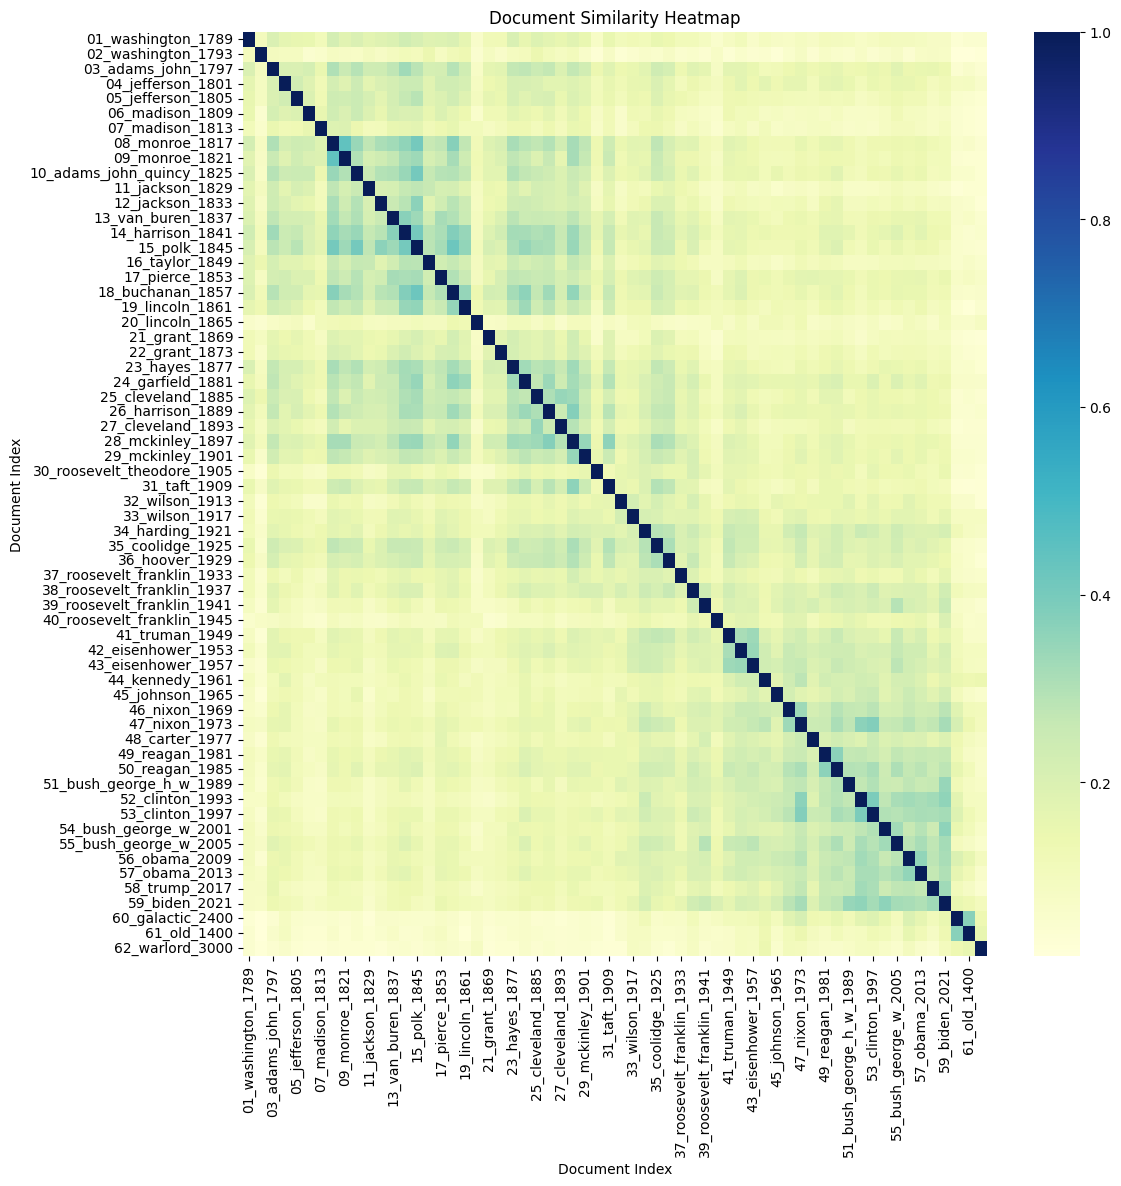

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Compute the dot product
similarity_matrix = tfidf_df.dot(tfidf_df.T)

# Generate a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(similarity_matrix, cmap="YlGnBu")
plt.title('Document Similarity Heatmap')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()


**The cell below will take the title of one of the speeches and return the 3 most similar speechs as determined by cosine similarity.**

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_docs_by_title(tfidf_vector, target_doc_title, text_titles, top_n=3):
    # Find the index of the target document based on its title
    if target_doc_title in text_titles:
        target_doc_index = text_titles.index(target_doc_title)
    else:
        return "The document title does not exist in the corpus."

    # Calculate cosine similarity between the target document and all documents in the corpus
    cosine_similarities = cosine_similarity(tfidf_vector[target_doc_index], tfidf_vector).flatten()

    # Get the indices of the top_n most similar documents, excluding the target document itself
    most_similar_doc_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

    # Map indices to titles
    most_similar_doc_titles = [text_titles[i] for i in most_similar_doc_indices]

    # Return the titles of the top_n most similar documents
    return most_similar_doc_titles

# Example usage
similar_docs_titles = find_most_similar_docs_by_title(tfidf_vector, "60_galactic_2400", text_titles)
print("60 similar documents:", similar_docs_titles)
similar_docs_titles = find_most_similar_docs_by_title(tfidf_vector, "61_old_1400", text_titles)
print("61 similar documents:", similar_docs_titles)
similar_docs_titles = find_most_similar_docs_by_title(tfidf_vector, "62_warlord_3000", text_titles)
print("62 similar documents:", similar_docs_titles)


60 similar documents: ['61_old_1400', '47_nixon_1973', '56_obama_2009']
61 similar documents: ['60_galactic_2400', '56_obama_2009', '62_warlord_3000']
62 similar documents: ['61_old_1400', '44_kennedy_1961', '60_galactic_2400']
